<a href="https://colab.research.google.com/github/zeba-hub/Deep-Learning/blob/master/Traffic_sign_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [4]:
import keras #Open source lib. Run on top of TF
from keras.models import Sequential
# Conv2D-extract important feature from image,like bluring,
# MaxPooling2D- reduce size of data without loosing important feature from data #Dimensionality reduction
from keras.layers.convolutional import Conv2D,MaxPooling2D 
#Dense- Fully connected layer. Each input node is connect to output layer # helps to predict label
#Dropout- Drops the neuron  during training,so that model is not over trained
#Flatten -convert 2D matrices into vector
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sb
import cv2
import pickle
import pandas as pd
import numpy as np
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading Dataset

In [5]:
#Clone the dataset into google colab
!git clone https://bitbucket.org/jadslim/german-traffic-signs


Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [6]:
#List the ds contents
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


test, train and valid files are in pickle  format

In [8]:
dataset= pd.read_csv('german-traffic-signs/signnames.csv')
dataset

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


43 unique labeled data

In [10]:
#loading pickel file dataset

with open('german-traffic-signs/train.p','rb') as train_data:
  train=pickle.load(train_data)

with open('german-traffic-signs/test.p','rb') as test_data:
  test=pickle.load(test_data)

with open('german-traffic-signs/valid.p','rb') as validation_data:
  valid=pickle.load(validation_data)


In [31]:
type(train)
print(train.keys())
print(test.keys())
print(valid.keys())
#train.values()


dict_keys(['coords', 'labels', 'features', 'sizes'])
dict_keys(['sizes', 'coords', 'features', 'labels'])
dict_keys(['coords', 'labels', 'features', 'sizes'])


In [32]:
list(enumerate(train))

[(0, 'coords'), (1, 'labels'), (2, 'features'), (3, 'sizes')]

In [ ]:
#checking the dictionary values
for index,key in enumerate(train):
    print(index,key,train[key])

In [34]:
X_train,y_train=train['features'],train['labels']
X_test,y_test=test['features'],test['labels']
X_valid,y_valid=valid['features'],valid['labels']

In [35]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(X_valid.shape,y_valid.shape)

(34799, 32, 32, 3) (34799,)
(12630, 32, 32, 3) (12630,)
(4410, 32, 32, 3) (4410,)


34799 images exist with size 32*32 pixel and 3 are colored images #train ds

# Image Visualization

5381
Image label : 3


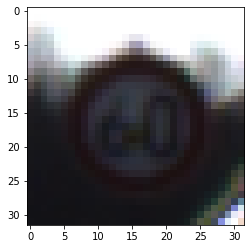

In [42]:
index= np.random.randint(1,len(X_train)) # this will set a particular value between 1 to length of x_train and reset it after each run
print(index)
plt.imshow(X_train[index])
print('Image label : {}'.format(y_train[index]))

# Image Pre-processing

Step 1: Converting to grayscale


> Because colors are not important for identifying the Traffic sign, shapes are important

Step 2 : Histogram Equalization
>Some images can be brighter or dim. Inorder to give equal effect to each img we need to perform equalization

Step 3: Normalization
>Changing value between 0 and 1 by dividing it by 255




In [43]:
# shuffle the data
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)

In [44]:
def preprocessing(img):
  #Convert to gray scale
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #Histogram Equalization
  img=cv2.equalizeHist(img)
  #Normalization
  img=img/255
  return img

In [47]:
#Map function helps to iterate the Function on each element
#eg 
a= lambda y: y**2
x=[10,20,30]
z=list(map(a,x))
print(z)

[100, 400, 900]


In [52]:
#lets apply this preprocessing Function on each element of train,test and validation dataset

X_train_preprocessed_1=np.array(list(map(preprocessing,X_train)))
X_test_preprocessed_1=np.array(list(map(preprocessing,X_test)))
X_validation_preprocessed_1=np.array(list(map(preprocessing,X_valid)))

In [53]:
#(34799, 32, 32, 3) (34799,)
#(12630, 32, 32, 3) (12630,)
#(4410, 32, 32, 3) (4410,)
X_train_preprocessed_1=X_train_preprocessed_1.reshape(34799, 32, 32, 1)
X_test_preprocessed_1=X_test_preprocessed_1.reshape(12630, 32, 32, 1)
X_validation_preprocessed_1=X_validation_preprocessed_1.reshape(4410, 32, 32, 1)

In [54]:
print(X_train_preprocessed_1.shape)
print(X_test_preprocessed_1.shape)
print(X_validation_preprocessed_1.shape)

(34799, 32, 32, 1) (34799,)
(12630, 32, 32, 1) (12630,)
(4410, 32, 32, 1) (4410,)


Text(0.5, 0, 'Orginial image')

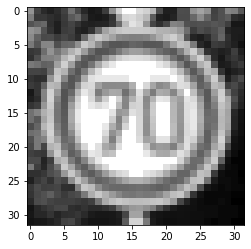

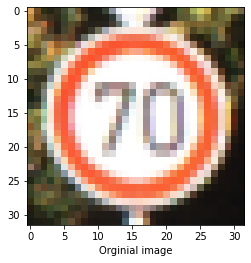

In [63]:
i=np.random.randint(1,len(X_train_preprocessed_1))
plt.imshow(X_train_preprocessed_1[i].squeeze(),cmap='gray')
plt.figure()
#plt.xlabel('Pre-processed')
plt.imshow(X_train[i].squeeze())
plt.xlabel('Orginial image')

#Building CNN model

In [67]:
model= Sequential()

#convolution layer 1
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1))) #1 mean image is of gray scale
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Convolution layer 2
model.add(Conv2D(64,(5,5),activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Flatten 
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.50))

#Output layer
model.add(Dense(43,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

In [69]:
#complile the model

model.compile(Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [70]:
history=model.fit(X_train_preprocessed_1,
                  y_train,
                  batch_size=500,
                  epochs=250,
                  verbose=1,
                  validation_data=(X_validation_preprocessed_1,y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/250
34799/34799 [==============================] - 9s 246us/step - loss: 3.5656 - accuracy: 0.0587 - val_loss: 3.5015 - val_accuracy: 0.1685
Epoch 2/250
34799/34799 [==============================] - 1s 32us/step - loss: 3.3724 - accuracy: 0.1179 - val_loss: 3.2320 - val_accuracy: 0.3152
Epoch 3/250
34799/34799 [==============================] - 1s 33us/step - loss: 2.9397 - accuracy: 0.2700 - val_loss: 2.6025 - val_accuracy: 0.4122
Epoch 4/250
34799/34799 [==============================] - 1s 32us/step - loss: 2.3586 - accuracy: 0.3953 - val_loss: 2.0186 - val_accuracy: 0.4961
Epoch 5/250
34799/34799 [==============================] - 1s 32us/step - loss: 1.9391 - accuracy: 0.4720 - val_loss: 1.6327 - val_accuracy: 0.5531
Epoch 6/250
34799/34799 [==============================] - 1s 32us/step - loss: 1.6463 - accuracy: 0.5335 - val_loss: 1.3532 - val_accuracy: 0.6306
Epoch 7/250
34799/34799 [==============================] - 1s 

# Evaluate Performance of model

In [73]:
score=model.evaluate(X_test_preprocessed_1,y_test)
print('Test accuracy',score[1])

12630/12630 [==============================] - 1s 70us/step
Test accuracy 0.9514647722244263


In [74]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

Text(0.5, 0, 'epochs')

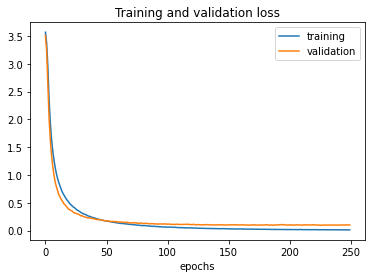

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epochs')


Text(0.5, 0, 'epochs')

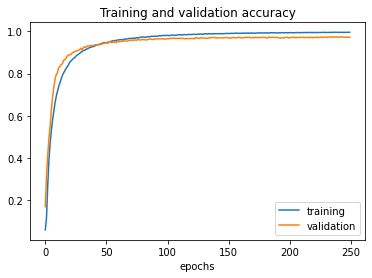

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epochs')

In [90]:
prediction_=model.predict_classes(X_test_preprocessed_1
                          )
y_label_true_=y_test

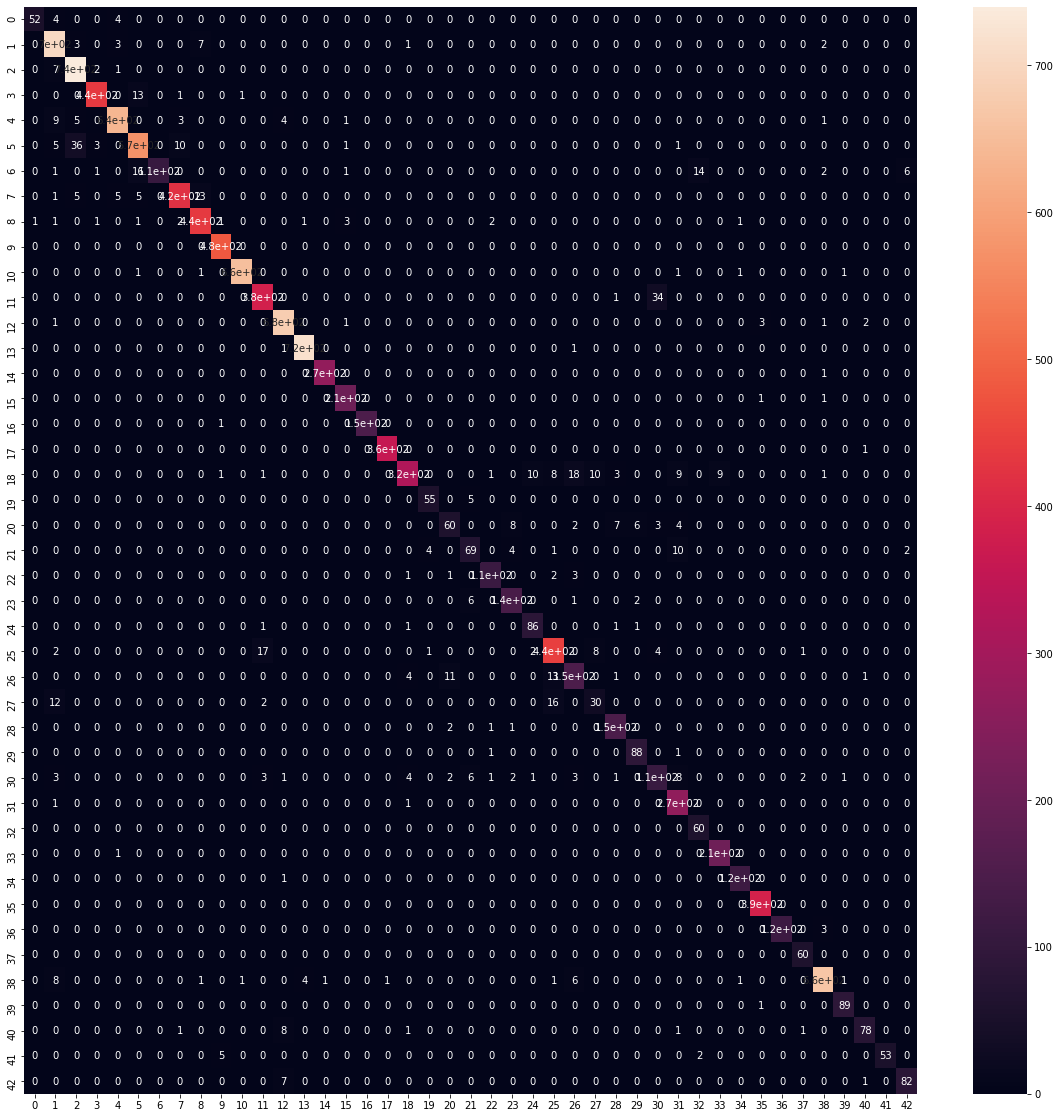

In [93]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_label_true_,prediction_)
plt.figure(figsize=(20,20))
sb.heatmap(matrix,annot=True)

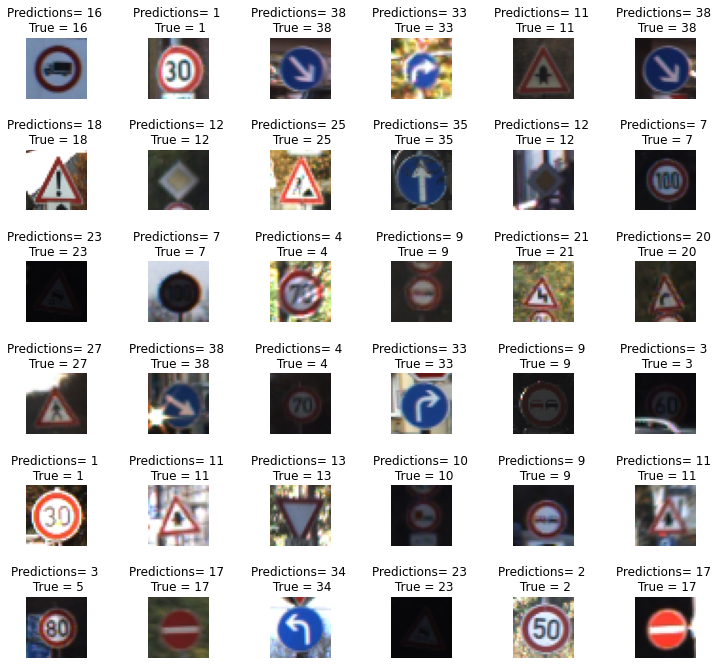

In [97]:
L=6
W=6
fig, axes= plt.subplots(L,W,figsize=(12,12))
axes= axes.ravel()#flatten our matrix

for i in range(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Predictions= {} \n True = {}'.format(prediction_[i],y_label_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [98]:
model.save('traffic_sign_model.h5')